In [110]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [111]:
location = "kc_house_data.csv"
df = pd.read_csv(location)

In [112]:
df=df.drop_duplicates()

In [113]:
meangrade = df['price'].mean()
stdgrade = df['price'].std()
toprange = meangrade + stdgrade * 1.96
botrange = meangrade - stdgrade * 1.96

df1 = df.copy() #to not mess up the original df
df1 = df1.drop(df1[df1['price'] > toprange].index)
df1 = df1.drop(df1[df1['price'] < botrange].index)

df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


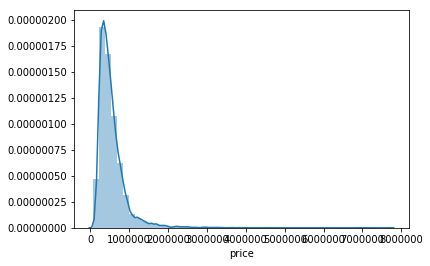

In [119]:
sns.distplot(df['price'])

In [120]:
df2=df[['price','bedrooms','zipcode','bathrooms','sqft_living','grade','yr_renovated']]

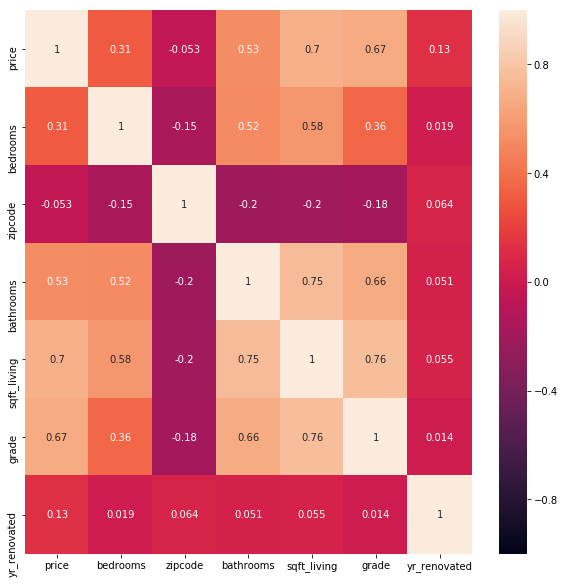

In [121]:
corr = df2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, vmin=-1, annot=True)

In [122]:
df2.size

151291

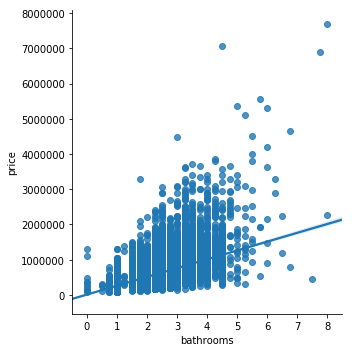

In [123]:
sns.lmplot(x='bathrooms', y='price', data=df2)

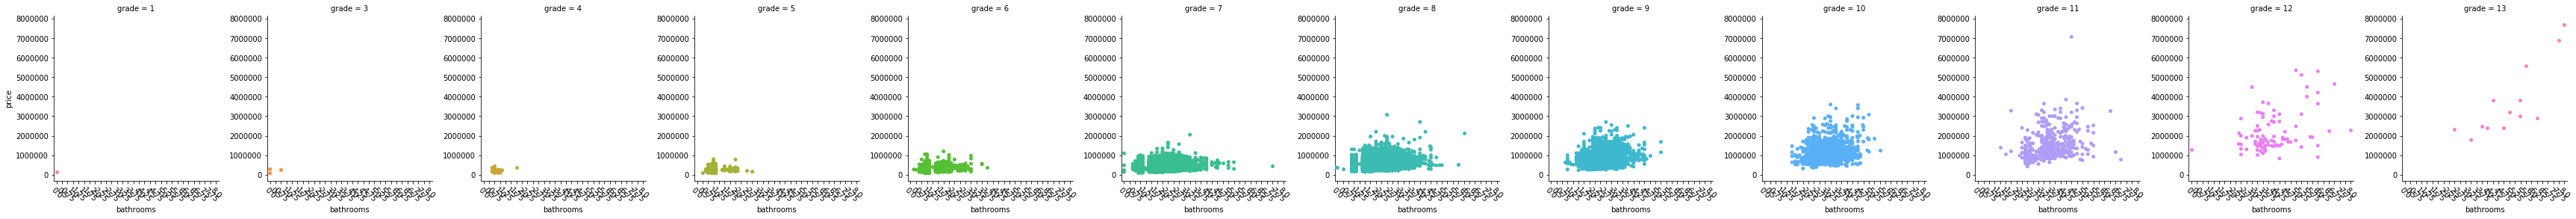

In [129]:
plt.figure(figsize=(20,20))
g = sns.factorplot(x='bathrooms', y='price',
                   data=df2,
                   hue='grade', 
                   col='grade',
                   kind='swarm')
g.set_xticklabels(rotation=-45)

In [132]:
df_new = df2[df2["grade"] >= 10]
df_new.head()

,price,bedrooms,zipcode,bathrooms,sqft_living,grade,yr_renovated
5,1225000.0,4,98053,4.50,5420,11,0
66,975000.0,4,98004,2.50,2720,10,0
70,1040000.0,5,98005,3.25,4770,11,0
75,832500.0,4,98075,4.00,3430,10,0
79,720000.0,4,98010,2.50,3450,10,0


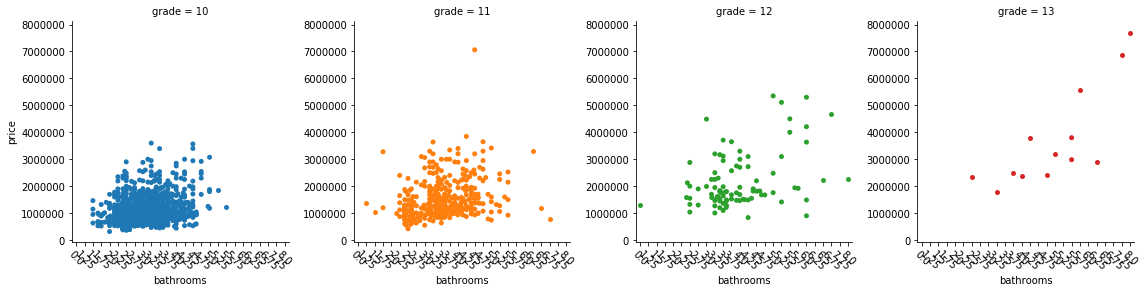

In [133]:
plt.figure(figsize=(20,20))
g = sns.factorplot(x='bathrooms', y='price',
                   data=df_new,
                   hue='grade', 
                   col='grade',
                   kind='swarm')
g.set_xticklabels(rotation=-45)